In [1]:
#Importing
import sys
import os
import numpy as np


util_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'util'))
sys.path.append(util_path)


from loading import dl
from relu_ridge import ReLURidge
from sigmoid_ridge import SigReg


1. Pull all trialwise mf data, making psuedo-population:

In [2]:

#This loading step takes a second

file_path = os.path.join('..', 'trialwise_data_collection', 'trialwise_all_neurons.hdf5')
out = dl.load_h5py(file_path)

#Filtering on Mossy Fibers
mfs = dl.filter_neuron(out, 'mossy')

unique names found: 
mossy fiber
total units found: 38


**Fitting from MF Data**

1.Ridge regression with RELU activation

Inputs:
$$
\begin{align*}
\mathbf{z} &= \begin{bmatrix} x \\ y \\ v_x \\ v_y \\ 1 \end{bmatrix} \\
\end{align*}
$$

Fitting:
$$
\mathbf{\beta} = \begin{bmatrix} b_1 \\ . \\ . \\ . \\ b_n \end{bmatrix}
$$

Output:
$$
\mathbf{y} = \mathbf{z}^\top \beta
$$
where y = firing rate

Training Loss (with l2 reg on all but bias)
$$
\mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left( \max(0, \mathbf{z}_i^\top \boldsymbol{\beta}) - y_i \right)^2 + \lambda \sum_{j=1}^{d-1} \beta_j^2
$$


Test Loss:
$$
\mathcal{L}_{\text{test}} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \left( \max(0, \mathbf{z}_i^\top \boldsymbol{\beta}) - y_i \right)^2
$$











Training: 100%|█████████████████████████| 10000/10000 [00:06<00:00, 1450.44it/s]


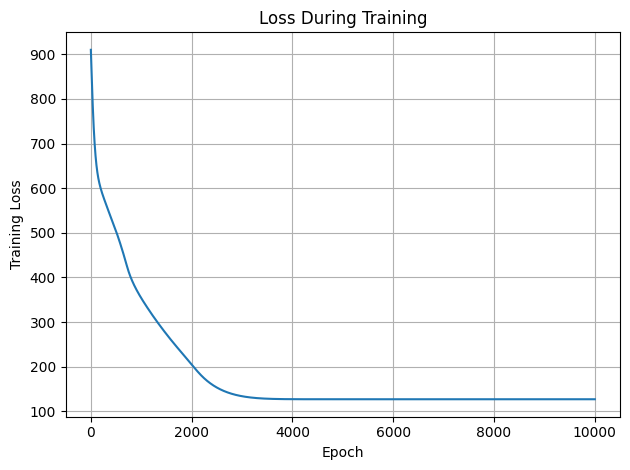

Test MSE on neuron (np.int64(14), np.int64(3)): 126.7432
v_x: 0.2729
v_y: -0.1527
x: -1.1190
y: 0.8168
bias: 18.9081


array([ 0.2728927 , -0.15267089, -1.1190337 ,  0.8168217 , 18.90815   ],
      dtype=float32)

In [3]:
first_key = list(mfs.keys())[7]
X_train, X_test, y_train, y_test = dl.make_ds(mfs, first_key, bias=True)



model = ReLURidge(n_features=X_train.shape[1], ridge_lambda=1.0, lr=1e-2)
model.fit(X_train, y_train, epochs=10000)
model.plot_loss()
mse = model.evaluate(X_test, y_test)
print(f"Test MSE on neuron {first_key}: {mse:.4f}")

feature_names = ['v_x', 'v_y', 'x', 'y', 'bias']
model.get_weights(feature_names)


Training: 100%|███████████████████████████████| 200/200 [00:41<00:00,  4.77it/s]

Test MSE: 26.0858


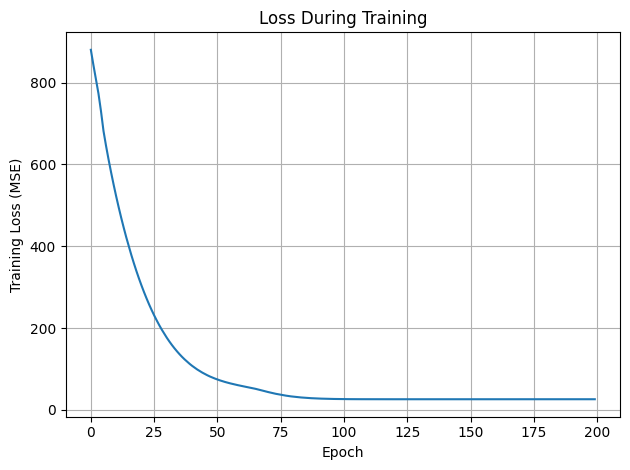

C (weights):
  x: 0.0107
  y: -0.0060
  v_x: 0.0129
  v_y: -0.0450
A (offset): 20.1865
B (scale): 19.3122


(array([ 0.01072775, -0.00595159,  0.0129352 , -0.04502509], dtype=float32),
 20.1865177154541,
 19.312183380126953)

In [4]:
first_key = list(mfs.keys())[7]
X_train, X_test, y_train, y_test = dl.make_ds(mfs, first_key, bias=False)

model = SigReg(n_features=4, ridge_lambda=1.0, lr=1e-2)
model.fit(X_train, y_train, epochs=200, batch_size=2048)
print(f"Test MSE: {model.evaluate(X_test, y_test):.4f}")
model.plot_loss()
model.get_parameters(['x', 'y', 'v_x', 'v_y'])